In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest
At most 3h
## Load the data

In [2]:
# Dataframe
path_df = "Pickles/df_clean.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

### Cross-Validation for Hyperparameter tuning

Hyperparameters of the model:


In [3]:
rfc = RandomForestClassifier()

print('Parameters currently in use:\n')
print(rfc.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Randomized Search Cross Validation
define the grid:

In [4]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 40, 60, 80, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### Random search

In [5]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator = rfc,
                                   param_distributions = random_grid,
                                   n_iter = 10,
                                   n_jobs = -1, # use all processors
                                   scoring = 'accuracy',
                                   cv = 3 , # 3 - folding
                                   verbose = 2)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [20, 40, 60, 80, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   scoring='accuracy', verbose=2)

In [6]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.8946231582195479


### Grid Search Cross Validation

In [7]:
# Create the parameter grid based on the results of random search 
temp = random_search.best_params_
bootstrap = [temp.get('bootstrap')]
max_features = [temp.get('max_features')]
n_estimators = [temp.get('n_estimators')]
if temp.get('max_depth') != None:
    max_depth = [temp.get('max_depth') - 10, temp.get('max_depth'), temp.get('max_depth') + 10]
min_samples_leaf = [1, 2, 4]
min_samples_split = [temp.get('min_samples_split'), temp.get('min_samples_split')*2]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 3,
                           verbose = 2)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  32.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  32.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  32.4s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=600; total time=  35.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=600; total time=  34.2s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=600; total time=  35.4s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimator

[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  32.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  31.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  32.1s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=600; total time=  31.3s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=600; total time=  31.4s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=600; total time=  31.5s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=  34.9s
[CV] END bootstrap=False, max_dept

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False], 'max_depth': [70, 80, 90],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [10, 20], 'n_estimators': [600]},
             scoring='accuracy', verbose=2)

In [8]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}

The mean accuracy of a model with these hyperparameters is:
0.8971688652318136


In [9]:
best_rfc = grid_search.best_estimator_

In [10]:
best_rfc

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=10,
                       n_estimators=600)

### Model fit and performance

In [4]:
path_best_rfc_test = "Models/rfc_20%/best_rfc.pickle"
with open(path_best_rfc_test, 'rb') as data:
    best_rfc = pickle.load(data)

In [5]:
# fit
best_rfc.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=False, max_depth=90, max_features='sqrt',
                       min_samples_split=100, n_estimators=600)

In [6]:
# predict
rfc_pred = best_rfc.predict(features_test)

In [7]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_rfc.predict(features_train)))

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, rfc_pred))

The training accuracy is: 
0.9236287896320297
The test accuracy is: 
0.8713360074051218


In [8]:
# Classification report
print("Classification report")
print(classification_report(labels_test,rfc_pred))

Classification report
              precision    recall  f1-score   support

           C       0.89      0.84      0.86       215
         C++       0.97      0.83      0.90       175
     Fortran       0.91      0.90      0.90       149
          Go       0.97      0.89      0.93       199
     Haskell       0.85      0.91      0.88       267
        Java       0.88      0.89      0.89       197
  JavaScript       0.86      0.80      0.83       217
       Julia       0.93      0.71      0.81       126
      Kotlin       1.00      0.96      0.98       129
      MATLAB       0.83      0.83      0.83       108
 Mathematica       0.73      0.96      0.83       185
         PHP       0.91      0.55      0.68        95
        Perl       0.77      0.94      0.85       227
      Python       0.89      0.93      0.91       290
           R       0.71      0.81      0.75       120
        Ruby       0.87      0.92      0.90       219
        Rust       1.00      0.75      0.86        83
     

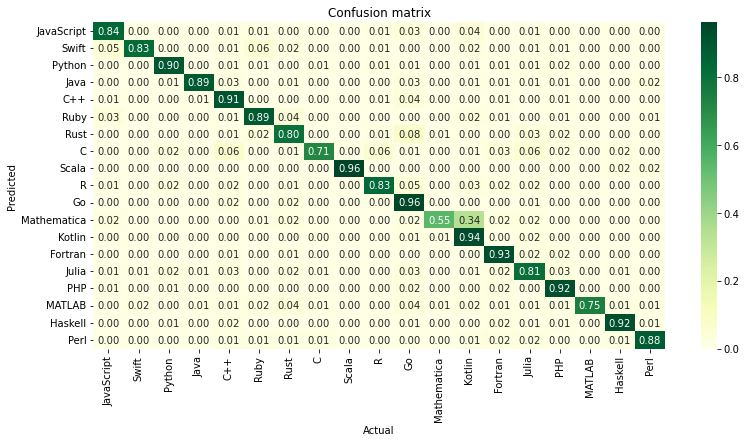

In [11]:
conf_matrix = confusion_matrix(labels_test, rfc_pred, normalize = 'true')
plt.figure(figsize=(12.8,6))

sns.heatmap(conf_matrix, 
            cmap="YlGn",
            annot = True,
            fmt = '.2f',
            xticklabels = df['language'].unique(),
            yticklabels = df['language'].unique())
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')

plt.savefig('conf.pdf')

In [ ]:
d = {
     'Model': 'Random Forest',
     'Training Set Accuracy': accuracy_score(labels_train, best_rfc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, rfc_pred)
}

df_models_rfc = pd.DataFrame(d, index=[0])

In [ ]:
df_models_rfc

In [ ]:
with open('Models/best_rfc.pickle', 'wb') as output:
    pickle.dump(best_rfc, output)
    
with open('Models/df_models_rfc.pickle', 'wb') as output:
    pickle.dump(df_models_rfc, output)